# ****FUTURE SKILLS AI BOOTCAMP LAB ASSESSMENT****

---

#Problem Statement -

You are provided with a dataset containing detailed information about real estate properties, including:

Target Variable: Selling price of the house.

Features:

Area (square footage)

Number of bedrooms

Number of bathrooms

Number of stories

Access to the main road

Presence of guest rooms

Basement availability

Type of heating

Presence of air conditioning

Number of parking spaces

Location preference

Furnishing status

Your task is to:

Build regression models (Decision Tree and Linear Regression) to accurately predict house prices.

Perform exploratory data analysis (EDA) to understand, visualize, and present key insights from the data.

Use cross-validation techniques to optimize model parameters and enhance performance.

Compare and evaluate the models based on their predictive accuracy and other performance metrics.**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from  google.colab import drive


In [ ]:
# Load dataset
file_path = "Housing.csv"  # Adjust if needed
df = pd.read_csv(file_path)

# Display dataset info
df.info()
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("Summary statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no

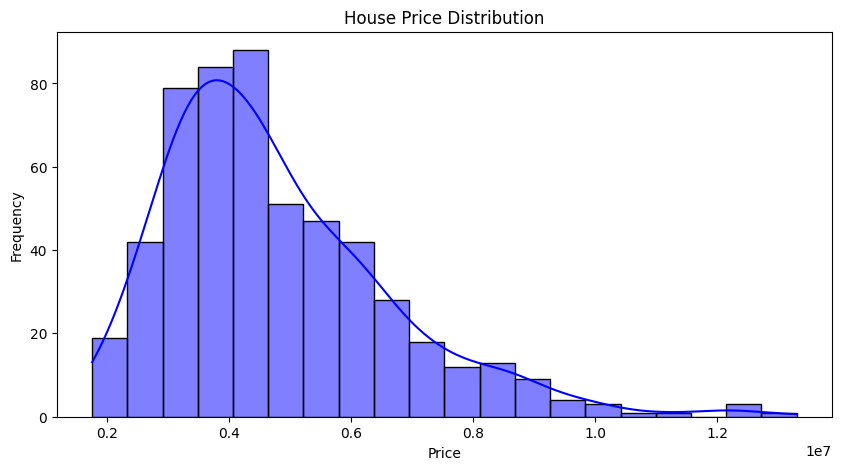

In [ ]:
# Visualize distribution of target variable (House Prices)
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=20, kde=True, color='blue')
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

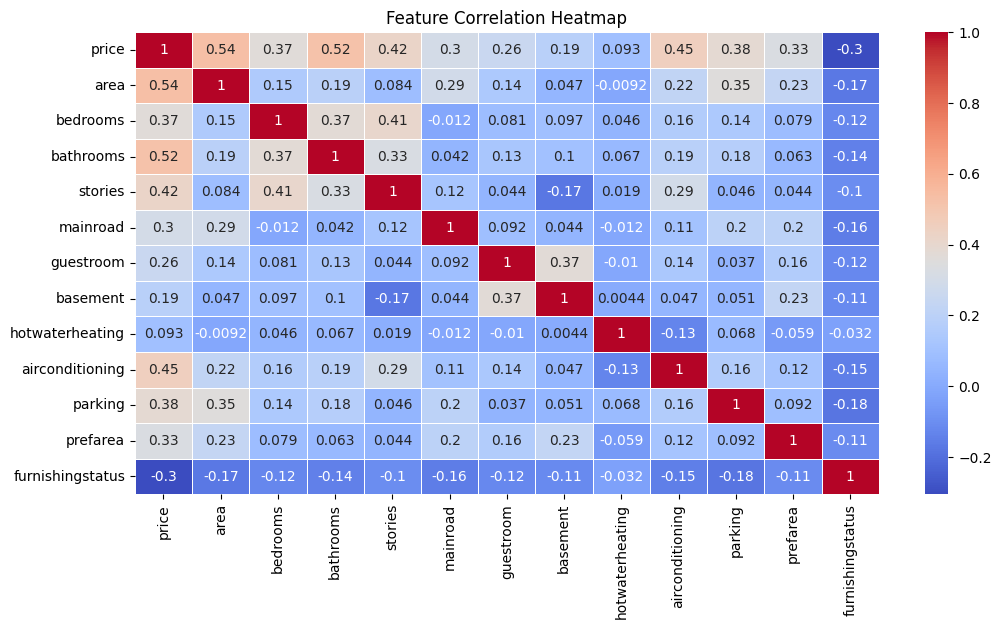

In [ ]:
# Ensure categorical variables are encoded before computing correlation
df_encoded = df.copy()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes  # Convert categorical to numeric

# Generate the correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


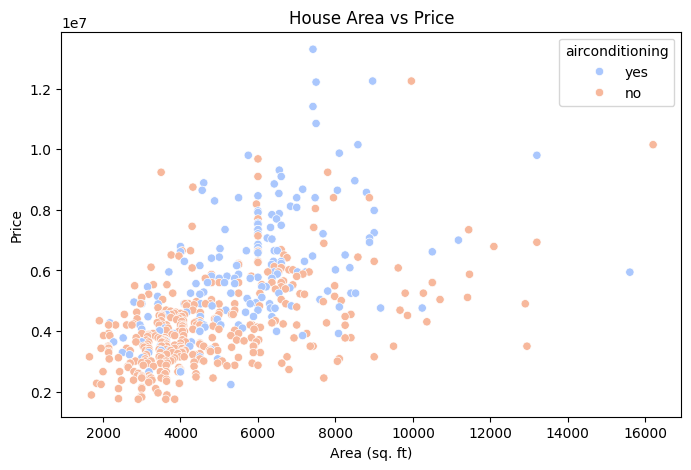

In [ ]:
# Scatter plot for area vs. price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['area'], y=df['price'], hue=df['airconditioning'], palette='coolwarm')
plt.title("House Area vs Price")
plt.xlabel("Area (sq. ft)")
plt.ylabel("Price")
plt.show()


<ipython-input-34-63fae4050d49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['furnishingstatus'], y=df['price'], palette='Set2')


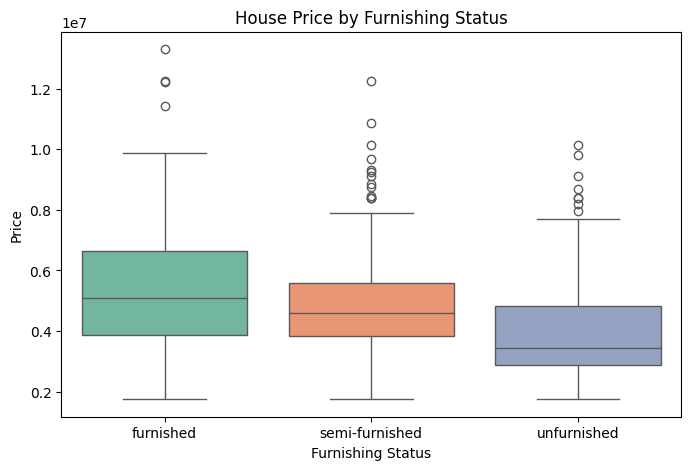

In [ ]:

# Box plot for price by furnishing status
plt.figure(figsize=(8,5))
sns.boxplot(x=df['furnishingstatus'], y=df['price'], palette='Set2')
plt.title("House Price by Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.show()

In [ ]:
# Encode categorical variables
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Decision Tree Regressor with hyperparameter tuning
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt_model = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("---------------------------")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='r2')
dt_cv_scores = cross_val_score(dt_model.best_estimator_, X_scaled, y, cv=5, scoring='r2')
print("Linear Regression CV Scores:", lr_cv_scores.mean())
print("Decision Tree CV Scores:", dt_cv_scores.mean())


Linear Regression Performance:
MAE: 979679.6912959907
MSE: 1771751116594.04
R2 Score: 0.6494754192267793
---------------------------
Decision Tree Performance:
MAE: 1258020.5784613148
MSE: 2855008998054.195
R2 Score: 0.43516286075747923
---------------------------
Linear Regression CV Scores: -9.910676773077187
Decision Tree CV Scores: -16.73483457704554
